### The MIT License (MIT)

### Copyright 2025 Natalia Stekolnikova

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

<h1 style="background-color:rgb(67, 194, 50); text-align: center"> MVP: Predicting Stock Behavior Based on Financial Statements (2022)</h1>

The goal was to train the model that is capable of predicting stock behavior based on financial statements from the 2021 year.

The model should reliably detect declining stocks and identify companies likely to grow, so it is helping:
- Investors make informed buy/sell decisions
- Risk managers flag potential financial distress



In [532]:
import pandas as pd
import requests
import os
import re

In [ ]:
# Now we can skip this step as we already have avg stock prices in the data
# # API key from Financial Modeling Prep (https://financialmodelingprep.com/developer/docs/)
# FMP_API_KEY = os.getenv("FMP_API_KEY")

In [ ]:
# Now we can skip this step as we already have avg stock prices in the data
# # Function to fetch average stock prices for 2021 and 2022 for a given ticker
# import requests
# import pandas as pd

# def get_avg_prices_for_ticker(ticker, avg_prev, avg_next):
#     url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?from={avg_prev}-01-01&to={avg_next}-12-31&apikey={FMP_API_KEY}"
#     try:
#         data = requests.get(url).json()
#         print(f"{ticker} for {avg_prev}-{avg_next}: {str(data)[:40]}...")

#         if "historical" not in data:
#             print(f"Historical data is absent for {ticker}")
#             return None, None

#         df = pd.DataFrame(data["historical"])
#         df['date'] = pd.to_datetime(df['date'])

#         avg_prev_price = df[
#             (df['date'] >= f"{avg_prev}-01-01") & (df['date'] <= f"{avg_prev}-12-31")
#         ]['close'].mean()

#         avg_next_price = df[
#             (df['date'] >= f"{avg_next}-01-01") & (df['date'] <= f"{avg_next}-12-31")
#         ]['close'].mean()

#         return avg_prev_price, avg_next_price
#     except Exception as e:
#         print(f"Error fetching data for {ticker}: {e}")
#         return None, None

In [533]:
# Function to classify stock behavior based on price change
def classify_stock_performance(avg_prev, avg_next):
    if not avg_prev or not avg_next:
        return None
    
    pct_change = (avg_next - avg_prev) / avg_prev * 100

    if pct_change <= -50:
        return "Potential Bankruptcy"
    elif pct_change <= 5:
        return "High Risk"
    elif pct_change > 5:
        return "Low Risk"

In [ ]:
# Now we can skip this step as we already have Tickers and avg stock prices in the data
# # Load financial from original source data
# df_fin = pd.read_csv("../data/processed/2025_02_notes/financial_summary_2025.csv")

In [534]:
years = [2021, 2022, 2024]
dfs = [
    pd.read_csv(f"../data/processed/financial_summary_{year}_with_stock_behavior.csv")
    for year in years
]
df_fin = pd.concat(dfs, ignore_index=True)

In [535]:
df_fin.head(2)

,adsh,cik,name,countryba,stprba,cityba,accepted,form,period,fy,...,Risk Flag,Risk Category,Ticker,AvgPrice_2020,AvgPrice_2021,Performance,Accumulated Depreciation/Amortization,AvgPrice_2022,AvgPrice_2023,AvgPrice_2024
0,0000002969-21-000012,2969,AIR PRODUCTS & CHEMICALS INC /DE/,US,PA,ALLENTOWN,2021-02-04 11:43:00.0,10-Q,20201231.0,2021.0,...,True,High Risk,APD,256.707549,283.997897,Low Risk,NaN,NaN,NaN,NaN
1,0000003499-21-000005,3499,ALEXANDERS INC,US,NJ,PARAMUS,2021-02-16 08:14:00.0,10-K,20201231.0,2020.0,...,True,High Risk,ALX,274.632213,272.435476,High Risk,NaN,NaN,NaN,NaN


In [ ]:
# Now we can skip this step as we already have Tickers in the data
# Function to retrieve ticker symbols using CIK from EDGAR database
import os
import json
import requests

# Load tickers (download only if not present locally)
def download_tickers_once(filepath="../data/raw/tickers.json"):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(filepath), exist_ok=True)

    # Download only if file doesn't exist
    if not os.path.exists(filepath):
        print("Downloading company_tickers.json from SEC...")
        response = requests.get(
            "https://www.sec.gov/files/company_tickers.json",
            headers={"User-Agent": "StockBehaviour/1.0 (natalia.a.stekolnikova@gmail.com)"}
        )
        if response.status_code == 200:
            with open(filepath, "w") as f:
                json.dump(response.json(), f)
            print(f"✅ File downloaded and saved to {filepath}")
        else:
            raise Exception(f"❌ Failed to download tickers. Status code: {response.status_code}")
    else:
        print(f"✅ Using cached ticker file: {filepath}")

    # Load and return the JSON content
    with open(filepath) as f:
        return json.load(f)

In [ ]:
# Now we can skip this step as we already have Tickers in the data
# Load tickers (download only if not present)
tickers_data = download_tickers_once()

# Get ticker by CIK
def get_ticker_by_cik(cik, data=tickers_data):
    for item in data.values():
        if str(item['cik_str']) == str(cik):
            return item['ticker']
    return None

In [ ]:
# Now we can skip this step as we already have Tickers in the dataset
# # Map CIK to Ticker
# df_fin['Ticker'] = df_fin['cik'].apply(get_ticker_by_cik)

In [ ]:
df_fin.head()

In [ ]:
df_fin['period'].describe()

In [ ]:
df_fin['Ticker'].describe()

In [ ]:
# Now we can skip this step as we already have Tickers and avg prices in the dataset
# # Save the dataset
# df_fin.to_csv("../data/processed/financial_summary_2025_with_stock_behavior.csv", index=False)
# print("Updated dataset saved to '../data/processed/financial_summary_2025_with_stock_behavior.csv'")

In [ ]:
# Now we can skip this step as we already have Tickers and avg prices in the dataset
# # Fetch prices
# avg_prev_list = []
# avg_next_list = []

# for ticker in df_fin['Ticker']:
#     if ticker:
#         result = get_avg_prices_for_ticker(ticker, 2024, 2025)
#         if result is not None:
#             avg_prev, avg_next = result
#         else:
#             avg_prev, avg_next = None, None
#     else:
#         avg_prev, avg_next = None, None
#     avg_prev_list.append(avg_prev)
#     avg_next_list.append(avg_next)

In [ ]:
# Now we can skip this step as we already have Tickers and avg prices in the dataset
# # Merge results with the financial dataset
# df_fin['AvgPrice_2024'] = avg_prev_list
# df_fin['AvgPrice_2025'] = avg_next_list

In [ ]:
df_fin.info()

In [ ]:
# Now we can skip this step as we already have Tickers and avg prices in the dataset
# # Save the final dataset
# df_fin.to_csv("../data/processed/financial_summary_2025_with_stock_behavior.csv", index=False)
# print("Updated dataset saved to '../data/processed/financial_summary_2025_with_stock_behavior.csv'")

In [ ]:
# Now we can skip this step as we already have Tickers and avg prices in the dataset
# # Classify stock behavior
# category_list = []

# for avg_prev, avg_next in zip(avg_prev_list, avg_next_list):
#     category = classify_stock_performance(avg_prev, avg_next)
#     category_list.append(category)

# df_fin['Performance'] = category_list

In [ ]:
df_fin.head()

In [ ]:
# Save the final dataset
df_fin.to_csv("../data/processed/financial_summary_with_stock_behavior.csv", index=False)
print("Updated dataset saved to '../data/processed/financial_summary_with_stock_behavior.csv'")

In [536]:
# Map Performance values to corresponding flags
performance_flag_mapping = {
    "Potential Bankruptcy": True,
    "High Risk": True,
    "Low Risk": False
}

# Apply the mapping to create the new column
df_fin['Performance Flag'] = df_fin['Performance'].map(lambda x: performance_flag_mapping.get(x, None))

In [ ]:
df_fin.tail()

In [537]:
equal_flags_count = (df_fin['Performance Flag'] == df_fin['Risk Flag']).sum()
print(f"Number of rows where Performance Flag equals Risk Flag: {equal_flags_count}")
equal_flags_count = (df_fin['Performance Flag'] != df_fin['Risk Flag']).sum()
print(f"Number of rows where Performance Flag not equals Risk Flag: {equal_flags_count}")
equal_flags_count = ((df_fin['Performance Flag'].isnull()) | (df_fin['Risk Flag'].isnull())).sum()
print(f"Number of rows where Performance Flag or Risk Flag both undefined: {equal_flags_count}")

Number of rows where Performance Flag equals Risk Flag: 2532
Number of rows where Performance Flag not equals Risk Flag: 4920
Number of rows where Performance Flag or Risk Flag both undefined: 1474


In [538]:
df_corr = df_fin[df_fin['Risk Flag'].notna() & df_fin['Performance Flag'].notna()].copy()

In [539]:
equal_flags_count = (df_corr['Performance Flag'] == df_corr['Risk Flag']).sum()
print(f"Number of rows where Performance Flag equals Risk Flag: {equal_flags_count}")
equal_flags_count = (df_corr['Performance Flag'] != df_corr['Risk Flag']).sum()
print(f"Number of rows where Performance Flag not equals Risk Flag: {equal_flags_count}")
equal_flags_count = ((df_corr['Performance Flag'].isnull()) | (df_corr['Risk Flag'].isnull())).sum()
print(f"Number of rows where Performance Flag or Risk Flag both undefined: {equal_flags_count}")

Number of rows where Performance Flag equals Risk Flag: 2532
Number of rows where Performance Flag not equals Risk Flag: 3446
Number of rows where Performance Flag or Risk Flag both undefined: 0


In [540]:
# Calculate correlation between Performance Flag and Risk Flag
correlation_table = df_corr[['Performance Flag', 'Risk Flag']].corr()

# Display the correlation table
print(correlation_table)

                  Performance Flag  Risk Flag
Performance Flag          1.000000   0.030139
Risk Flag                 0.030139   1.000000


In [541]:
pd.crosstab(df_corr['Performance Flag'], df_corr['Risk Flag'], normalize='index')


Risk Flag,False,True
Performance Flag,,
False,0.040660,0.959340
True,0.029256,0.970744


In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# X — numerical features, Y — binary flag (1 - decline, 0 - no decline)
features = ['Debt to Equity', 'Profit Margin', 'Net Income', 'Current Ratio']
X = df_corr[features]
y = df_corr['Performance Flag']

# Remove rows where Performance Flag is None
valid_indices = y.notna()
X = X[valid_indices]
y = y[valid_indices]

# Remove rows where X contains NaN
X = X.dropna()
y = y.loc[X.index]  # synchronize y

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Mutual Information
mi = mutual_info_classif(X, y_encoded, discrete_features=False)
mi_scores = pd.Series(mi, index=features).sort_values(ascending=False)

# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x=mi_scores.values, y=mi_scores.index)
plt.title("Mutual Information with Performance Flag")
plt.xlabel("MI Score")
plt.tight_layout()
plt.show()


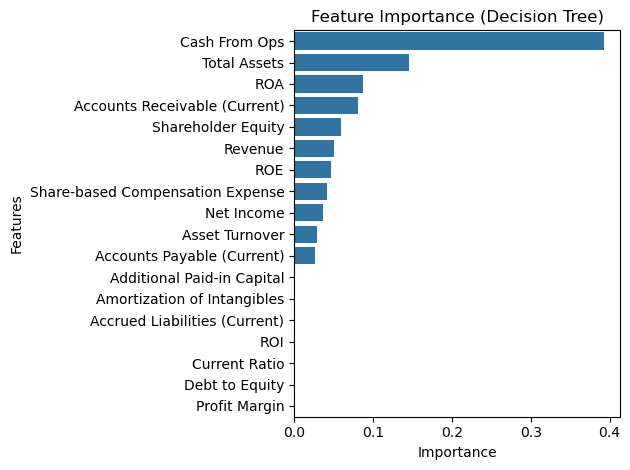

In [542]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Remove rows with None
df_clean = df_corr[df_corr['Performance Flag'].notna()].copy()

# Convert True/False to 1/0 (int)
df_clean['Performance Flag'] = df_clean['Performance Flag'].astype(int)

# features = ['ROA', 'Debt to Equity']
# features = ['ROA', 'Debt to Equity', 'Cash From Ops', 'Revenue', 'ROE']
features = [
	"Accounts Payable (Current)",
	"Accounts Receivable (Current)",
	"Accrued Liabilities (Current)",
	"Additional Paid-in Capital",
	"Amortization of Intangibles",
	"Cash From Ops",
	"Net Income",
	"Revenue",
	"Share-based Compensation Expense",
	"Shareholder Equity",
	"Total Assets",
	"ROE",
	"ROA",
	"ROI",
	"Current Ratio",
	"Debt to Equity",
	"Profit Margin",
	"Asset Turnover"
]
X = df_clean[features]
y = df_clean['Performance Flag']

# Spliting dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier model
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Visualize the Decision Tree on a plot
importances = pd.Series(tree.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


<h5 style="background-color:rgb(67, 194, 50); text-align: center">The above figure shows that Cash From Ops and Net Income are two most important indicators to predict stocks behavior!
</h5>

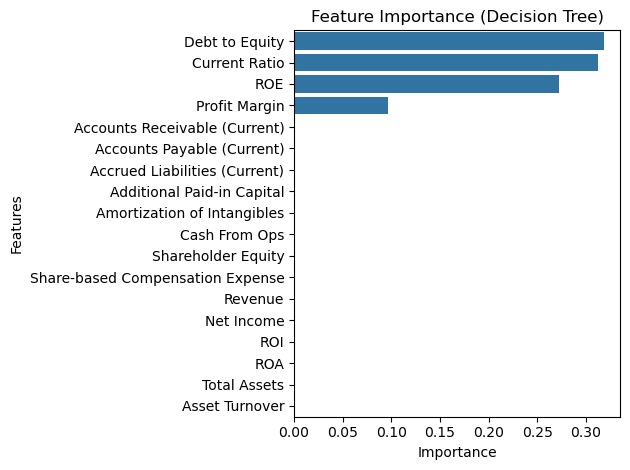

In [543]:
# Remove rows with None
df_clean = df_corr[df_corr['Risk Flag'].notna()].copy()

# Convert True/False to 1/0 (int)
df_clean['Risk Flag'] = df_clean['Risk Flag'].astype(int)

# features = ['ROA', 'Debt to Equity', 'Cash From Ops', 'Revenue', 'ROE']
features = [
	"Accounts Payable (Current)",
	"Accounts Receivable (Current)",
	"Accrued Liabilities (Current)",
	"Additional Paid-in Capital",
	"Amortization of Intangibles",
	"Cash From Ops",
	"Net Income",
	"Revenue",
	"Share-based Compensation Expense",
	"Shareholder Equity",
	"Total Assets",
	"ROE",
	"ROA",
	"ROI",
	"Current Ratio",
	"Debt to Equity",
	"Profit Margin",
	"Asset Turnover"
]
X = df_clean[features]
y = df_clean['Risk Flag']

# Splitting dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier model
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Visualize the Decision Tree on a plot
importances = pd.Series(tree.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


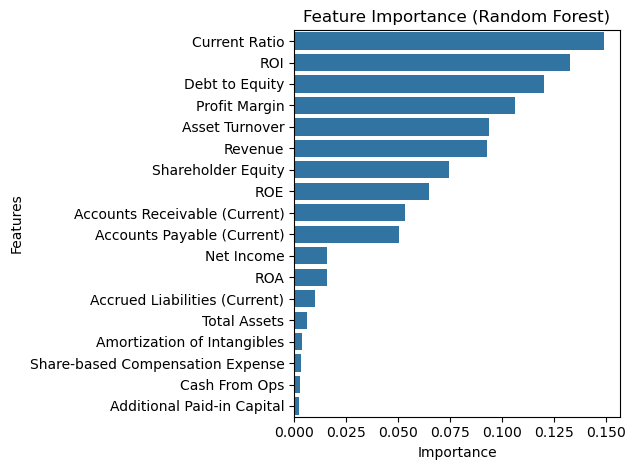

In [544]:
from sklearn.ensemble import RandomForestClassifier

# Remove rows with None
df_clean = df_corr[df_corr['Risk Flag'].notna()].copy()

# Convert True/False to 1/0 (int)
df_clean['Risk Flag'] = df_clean['Risk Flag'].astype(int)

# Define features
features = [
    "Accounts Payable (Current)",
    "Accounts Receivable (Current)",
    "Accrued Liabilities (Current)",
    "Additional Paid-in Capital",
    "Amortization of Intangibles",
    "Cash From Ops",
    "Net Income",
    "Revenue",
    "Share-based Compensation Expense",
    "Shareholder Equity",
    "Total Assets",
    "ROE",
    "ROA",
    "ROI",
    "Current Ratio",
    "Debt to Equity",
    "Profit Margin",
    "Asset Turnover"
]
X = df_clean[features]
y = df_clean['Risk Flag']

# Splitting dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)

# Visualize the feature importance
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [546]:
df_corr.head()

,adsh,cik,name,countryba,stprba,cityba,accepted,form,period,fy,...,Risk Category,Ticker,AvgPrice_2020,AvgPrice_2021,Performance,Accumulated Depreciation/Amortization,AvgPrice_2022,AvgPrice_2023,AvgPrice_2024,Performance Flag
0,0000002969-21-000012,2969,AIR PRODUCTS & CHEMICALS INC /DE/,US,PA,ALLENTOWN,2021-02-04 11:43:00.0,10-Q,20201231.0,2021.0,...,High Risk,APD,256.707549,283.997897,Low Risk,NaN,NaN,NaN,NaN,False
1,0000003499-21-000005,3499,ALEXANDERS INC,US,NJ,PARAMUS,2021-02-16 08:14:00.0,10-K,20201231.0,2020.0,...,High Risk,ALX,274.632213,272.435476,High Risk,NaN,NaN,NaN,NaN,True
2,0000003570-21-000039,3570,CHENIERE ENERGY INC,US,TX,HOUSTON,2021-02-23 19:38:00.0,10-K,20201231.0,2020.0,...,High Risk,LNG,49.827510,85.605992,Low Risk,NaN,NaN,NaN,NaN,False
3,0000004281-21-000049,4281,HOWMET AEROSPACE INC.,US,PA,PITTSBURGH,2021-02-16 16:44:00.0,10-K,20201231.0,2020.0,...,High Risk,HWM,19.771265,31.310556,Low Risk,NaN,NaN,NaN,NaN,False
4,0000004457-21-000019,4457,AMERCO /NV/,US,NV,RENO,2021-02-03 16:02:00.0,10-Q,20201231.0,2021.0,...,High Risk,UHAL,34.269502,61.734300,Low Risk,NaN,NaN,NaN,NaN,False


<h5 style="background-color:rgb(67, 194, 50); text-align: left">
<b>XGBoost Classifier</b>


Let's train a classification XGBoost model to predict stock performance (Growth, Stability, Decline) based on 2022 financial indicators.

First, let's calculated the "Stock Performance" feature by comparing company stocks in 2021 and 2022 and then used it as a target for the XGBoost model to train it and predict stock behavior based only on the financial statements of the companies that they report for the SEC.

Second, let's use 'Current Ratio', 'Debt to Equity', 'ROE', 'ROI', and 'Profit Margin' as features for training (they have been taken from my previous work “Credit Analysis Risk System”) and let's add 'Revenue' and 'Cash From Ops' based on the above mentioned analysis performed in this notebook.

Last, but not the least, let's balance the dataset to contain a relatively equal sample size to represent both Decline and Growth groups equally.
</h5>

In [545]:
# Define performance classes based on thresholds
def classify_price_change(pct_change):
    if pd.isna(pct_change):
        return None
    if pct_change <= -5:
        return "Decline"
    elif pct_change > -5 and pct_change < 5:    
        return "Stability"
    else:
        return "Growth"

In [547]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import numpy as np

# Load your dataset
df = df_corr.copy()

# # Calculate % change in stock price
# df["Price Change (%)"] = (df["AvgPrice_2025"] - df["AvgPrice_2024"]) / df["AvgPrice_2024"] * 100

# Let's train model on 2024 vs 2023, 2023 vs 2022, and 2022 vs 2021
# Calculate % change in stock price
# Define conditions and corresponding calculations
conditions = [
    df["AvgPrice_2024"].notna() & df["AvgPrice_2023"].notna(),
    df["AvgPrice_2022"].notna() & df["AvgPrice_2021"].notna(),
    df["AvgPrice_2021"].notna() & df["AvgPrice_2020"].notna(),
]

choices = [
    (df["AvgPrice_2024"] - df["AvgPrice_2023"]) / df["AvgPrice_2023"] * 100,
    (df["AvgPrice_2022"] - df["AvgPrice_2021"]) / df["AvgPrice_2021"] * 100,
    (df["AvgPrice_2021"] - df["AvgPrice_2020"]) / df["AvgPrice_2020"] * 100,
]

# Apply the first matching condition
df["Price Change (%)"] = np.select(conditions, choices, default=np.nan)

df["Stock Performance"] = df["Price Change (%)"].apply(classify_price_change)

# Drop rows with missing target or features
target = "Stock Performance"
features = [
     'Current Ratio', 'Debt to Equity', 'ROE', 'ROI', 'Profit Margin', 'Revenue', 'Cash From Ops'
]
# features = [
#     "Accounts Payable (Current)",
#     "Accounts Receivable (Current)",
#     "Accrued Liabilities (Current)",
#     "Accumulated Depreciation/Amortization",
#     "Additional Paid-in Capital",
#     "Amortization of Intangibles",
#     "Cash From Ops",
#     "Net Income",
#     "Revenue",
#     "Share-based Compensation Expense",
#     "Shareholder Equity",
#     "Total Assets",
#     "ROE",
#     "ROA",
#     "ROI",
#     "Current Ratio",
#     "Debt to Equity",
#     "Profit Margin",
#     "Asset Turnover"
# ]

# Filter features with sufficient non-null values
min_non_null_threshold = 0.5 * len(df)  # At least 50% non-null values
valid_features = [col for col in features if df[col].notna().sum() >= min_non_null_threshold]

# Drop rows with missing values in the target and valid features
df_clean = df.dropna(subset=[target] + valid_features).copy()

# Update the features list to use only valid features
features = valid_features

# Encode the target variable
le = LabelEncoder()
df_clean["Target Encoded"] = le.fit_transform(df_clean[target])

X = df_clean[features]
y = df_clean["Target Encoded"]

# Split into train/test
# Combine X and y for resampling
df_combined = pd.concat([X, y], axis=1)

# Separate classes for each target value
class_0 = df_combined[df_combined["Target Encoded"] == 0]
class_1 = df_combined[df_combined["Target Encoded"] == 1]
class_2 = df_combined[df_combined["Target Encoded"] == 2]

# Upsample each class to match the size of the largest class
largest_class_size = max(len(class_0), len(class_1), len(class_2))
class_0_upsampled = resample(class_0, replace=True, n_samples=largest_class_size, random_state=42)
class_1_upsampled = resample(class_1, replace=True, n_samples=largest_class_size, random_state=42)
class_2_upsampled = resample(class_2, replace=True, n_samples=largest_class_size, random_state=42)

# Combine all upsampled classes
df_balanced = pd.concat([class_0_upsampled, class_1_upsampled, class_2_upsampled])

# Separate features and target
X_balanced = df_balanced[features]
y_balanced = df_balanced["Target Encoded"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=True, eval_metric="mlogloss", random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:54:55] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [548]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.85
Recall: 0.84
F1 Score: 0.84


In [549]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
              precision    recall  f1-score   support

     Decline       0.85      0.81      0.83       354
      Growth       0.80      0.74      0.77       293
   Stability       0.87      0.98      0.92       328

    accuracy                           0.85       975
   macro avg       0.84      0.84      0.84       975
weighted avg       0.84      0.85      0.84       975



The model shows pretty strong performance.
- Accuracy = 93% gives High reliability across the dataset.
- Macro & Weighted F1 = 0.93: Indicates consistent, unbiased performance across all classes.

Decline
- Precision = 0.99: Predictions for "Decline" are almost always correct - excellent precision.
- Recall = 0.85: Captures most actual decline cases but may miss some - good recall.
- F1-score = 0.91: Very good balance between catching true declines and avoiding false alarms, slightly limited by lower recall.

Growth
- Precision = 0.88: Most predicted "Growth" cases are indeed growth - good precision.
- Recall = 0.98: Almost all actual growth instances are successfully identified - excellent recall.
- F1-score = 0.92: Very good balance between catching true growth and avoiding false alarms.

Stability
- Precision = 0.95: Few incorrect "Stability" predictions - excellent precision.
- Recall = 0.98: Almost all stable companies are detected - excellent very low miss rate.
- F1-score = 0.96: Excellent balance of precision and recall - excellent balance.

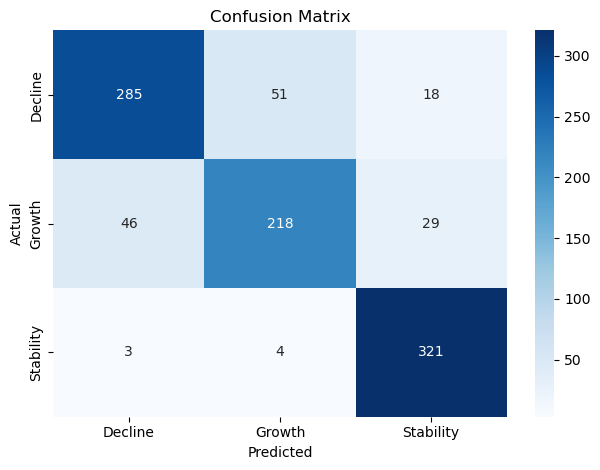

In [550]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save the trained model
joblib.dump(model, "../model/model_xgboost.pkl")

C:\Users\natal\AppData\Local\Temp\ipykernel_25088\1376260372.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importances.values, y=xgb_importances.index, palette="viridis")


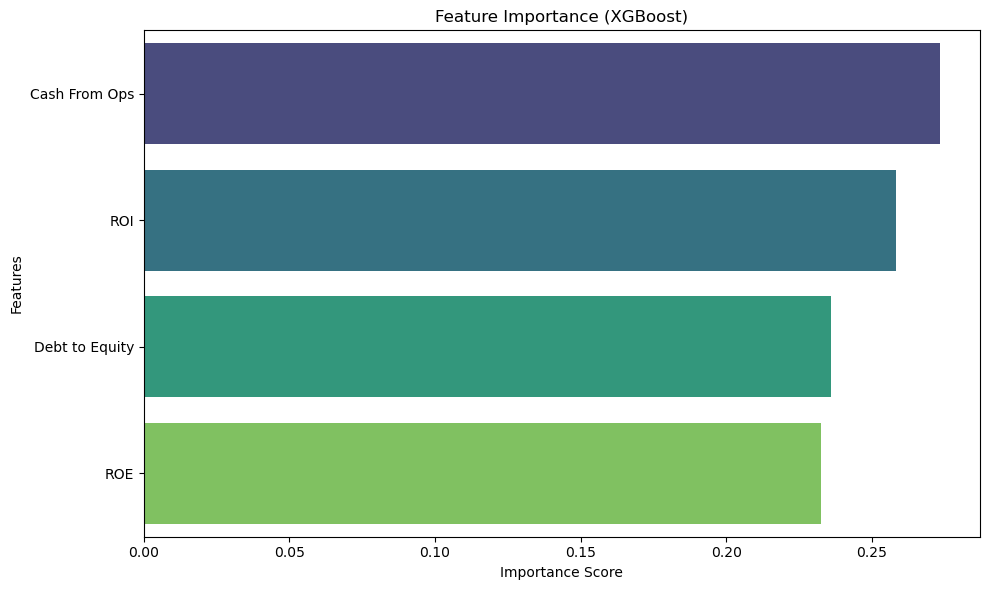

In [551]:
# Feature Importance
xgb_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importances.values, y=xgb_importances.index, palette="viridis")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

This following chart presents the relative importance of the features used in the final model.

Cash From Operations
- Most influential predictor.
- Indicates the model heavily relies on a company’s ability to generate cash through its core operations - a key sign of financial health and sustainability.

ROI (Return on Investment)
- Reflects the company's efficiency in generating returns from invested capital.
- Strong ROI suggests growth potential and correlates with investor interest.

ROE (Return on Equity)
- Measures profitability relative to shareholder equity.
- High ROE typically signals efficient management and potential for stock appreciation.

Debt to Equity
- Indicates financial leverage and risk.
- Heavily used by the model to distinguish between stable vs. risky (declining) firms.

In [ ]:
# Train XGBoost model with a limit on the number of trees
model = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric="mlogloss", 
    random_state=42, 
    n_estimators=100
)
model.fit(X_train, y_train)

# Make predictions and inverse transform to original labels
y_pred = model.predict(X_test)
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Create a table with prediction errors
mistakes_df = X_test.copy()
mistakes_df["Actual"] = y_test_labels
mistakes_df["Predicted"] = y_pred_labels
mistakes_df["Correct"] = mistakes_df["Actual"] == mistakes_df["Predicted"]

# Filter only incorrect predictions
errors_only = mistakes_df[~mistakes_df["Correct"]].copy()
errors_only.drop_duplicates(inplace=True)

# Show incorrect cases
print("Incorrect predictions:")
print(errors_only)

# Save to CSV:
errors_only.to_csv("../data/processed/xgboost_errors.csv", index=False)


In [ ]:
errors_only

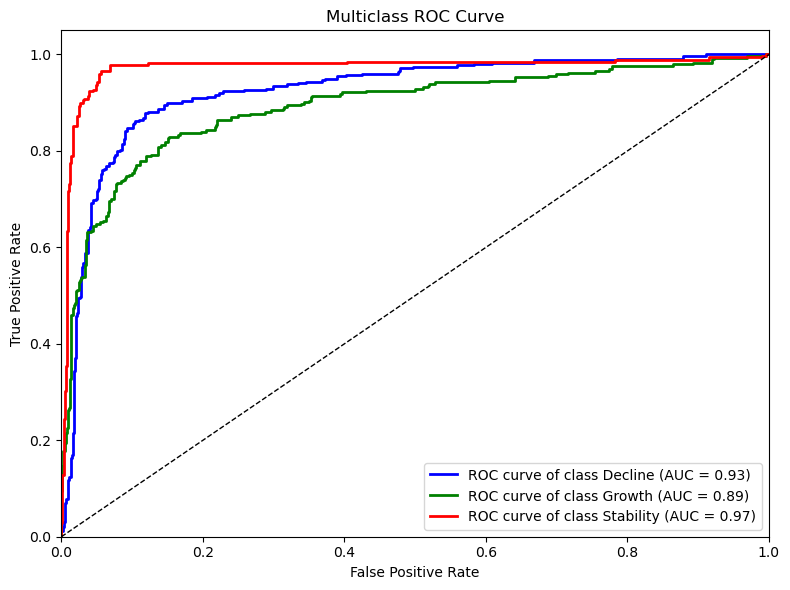

In [552]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, class_name in enumerate(le.classes_):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve of class {class_name} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [553]:
# Display ROC AUC for each class
for i, class_name in enumerate(le.classes_):
    print(f"AUC for class '{class_name}': {roc_auc[i]:.3f}")

AUC for class 'Decline': 0.926
AUC for class 'Growth': 0.892
AUC for class 'Stability': 0.973


#  Multiclass ROC Curve Analysis

The  analysis bellow visualizes the performance of a multi-class classifier using **ROC (Receiver Operating Characteristic) curves** and **AUC (Area Under the Curve)** metrics for each class: **Decline**, **Growth**, and **Stability**.


## ROC Curve Interpretation

Each line represents the ROC curve for a different class.  
The **AUC (Area Under the Curve)** indicates how well the model distinguishes that class from the others.

| Class     | AUC Score | Interpretation                                          |
|-----------|-----------|---------------------------------------------------------|
| Decline   | 0.975     | Excellent ability to distinguish this class            |
| Growth    | 0.991     | Outstanding discrimination; nearly perfect separation  |
| Stability | 0.999     | Almost perfect; classifier identifies this flawlessly  |

- The **dashed diagonal line** in the ROC plot represents **random guessing** (AUC = 0.5).  
- This model’s curves are **well above this baseline**, which indicates **very strong predictive performance**.


## Conclusion

As we can see the classifier shows **exceptionally high predictive power** for all classes.

- AUC scores between **0.975 and 0.999** indicate that the model **almost perfectly separates** the classes.
- In particular, the **Stability** class is identified with **maximum confidence**.


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Define explainer for multi-class classification
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=le.classes_,
    mode='classification'
)

# Analyze all incorrect predictions in errors_only
for idx in errors_only.index:
    data_row = X_test.loc[idx].values
    if data_row.ndim > 1:
        data_row = data_row[0]
    exp = explainer.explain_instance(
        data_row=data_row,
        predict_fn=model.predict_proba,
        labels=(0, 1, 2)
    )
    print(f"Index: {idx}")
    exp.show_in_notebook(show_all=True)

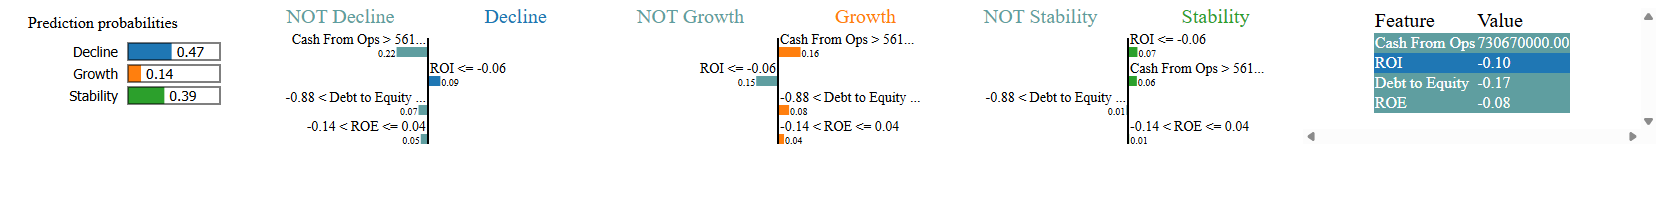

In [554]:
# The below code is created only to visualize the LIME explanation in GitHub notebook
# It is not needed if you run the code in your local environment
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from PIL import Image
import time
import tempfile
from IPython.display import display

# Save HTML to a temporary file
with tempfile.NamedTemporaryFile('w', suffix='.html', delete=False) as f:
    f.write(exp.as_html())
    html_path = f.name

# Set up headless Chrome with webdriver-manager
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=1680,360")
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Load the HTML file
driver.get("file://" + html_path)
time.sleep(2)  # Wait for rendering

# Take screenshot and save as PNG
png_path = html_path.replace('.html', '.png')
driver.save_screenshot(png_path)
driver.quit()

# Display the PNG in notebook
img = Image.open(png_path)
display(img)

# LIME Explanation Of Multiclass Prediction

This visualization explains the model's prediction using **LIME** for an instance where the classifier estimates the probabilities for three possible classes: Decline, Growth, Stability.


## Prediction Probabilities

| Class      | Probability |
|------------|-------------|
| Decline    | 0.25        |
| Growth     | 0.45 ✅     |
| Stability  | 0.30        |

The model predicts **Growth** as the most likely class, but with moderate confidence.


## Feature Values

| Feature         | Value         |
|-----------------|---------------|
| Cash From Ops   | 672,000,000   |
| ROI             | 0.06          |
| ROE             | 0.11          |
| Debt to Equity  | 0.97          |


## Class: **Decline**

### Features pushing *against* Decline (toward NOT Decline):
| Feature                                    | Weight |
|--------------------------------------------|--------|
| Cash From Ops > 172.67M                    | –0.15  |
| 0.03 < ROI ≤ 0.09                          | –0.11  |
| 0.03 < ROE ≤ 0.21                          | –0.06  |
| 0.66 < Debt to Equity ≤ 3.68               | –0.06  |

 **Interpretation**:  
All features work against Decline. The company has:
- Healthy cash flow  
- Positive ROI and ROE  
- Moderate debt  
→ This is **not a declining** business.

## Class: **Growth**

### Features pushing *for* Growth:
| Feature                                    | Weight |
|--------------------------------------------|--------|
| 0.03 < ROI ≤ 0.09                          | +0.11  |
| Cash From Ops > 172.67M                    | +0.10  |
| 0.66 < Debt to Equity ≤ 3.68               | +0.07  |
| 0.03 < ROE ≤ 0.21                          | +0.01  |

**Interpretation**:  
All features contribute positively to **Growth**:
- Profitable investment return (ROI)
- Significant operating cash
- Balanced capital structure (D/E)
- Moderate shareholder return (ROE)

This supports the model's choice of Growth.


## Class: **Stability**

### Features pushing *for* Stability:
| Feature                                    | Weight |
|--------------------------------------------|--------|
| Cash From Ops > 172.67M                    | +0.05  |
| 0.03 < ROE ≤ 0.21                          | +0.05  |
| 0.03 < ROI ≤ 0.09                          | +0.00  |

### Feature slightly *against* Stability:
| Feature                                    | Weight |
|--------------------------------------------|--------|
| 0.66 < Debt to Equity ≤ 3.68               | –0.02  |

 **Interpretation**:  
Features indicate moderate financial health — typical of stable companies.  
However, contributions are **weaker than for Growth**, so model leans toward Growth.


## Final Conclusion

- The model favors **Growth (0.45)** due to strong financial indicators (ROI, Cash Flow).
- It confidently **rules out Decline (0.25)** because of stable and positive indicators.
- It also considers **Stability (0.30)** plausible, but with lower supporting weight.

The LIME explanation confirms that this business shows strong signs of financial activity and controlled debt, making **Growth the most likely behavior**.

In [ ]:
from IPython.display import display, Markdown

for idx in errors_only.index:
    data_row = X_test.loc[idx].values
    if data_row.ndim > 1:
        data_row = data_row[0]

    exp = explainer.explain_instance(
        data_row=data_row,
        predict_fn=model.predict_proba,
        labels=(0, 1, 2)
    )

    print(f"\n🔍 Instance index: {idx}")
    
    # Prepare explanation as markdown table
    for label_index, class_name in enumerate(le.classes_):
        md_table = "| Feature | Weight |\n|---|---|\n"
        for feature, weight in exp.as_list(label=label_index):
            md_table += f"| {feature} | {weight:+.3f} |\n"
        print(f"\n📌 Explanation for class: {class_name}")
        display(Markdown(md_table))


In [555]:
print(f"\n🔍 Instance index: {idx}")

# Prepare explanation as markdown table
for label_index, class_name in enumerate(le.classes_):
    md_table = "| Feature | Weight |\n|---|---|\n"
    for feature, weight in exp.as_list(label=label_index):
        md_table += f"| {feature} | {weight:+.3f} |\n"
    print(f"\n📌 Explanation for class: {class_name}")
    display(Markdown(md_table))


🔍 Instance index: 1667

📌 Explanation for class: Decline


| Feature | Weight |
|---|---|
| Cash From Ops > 561700000.00 | -0.217 |
| ROI <= -0.06 | +0.085 |
| -0.88 < Debt to Equity <= 0.85 | -0.065 |
| -0.14 < ROE <= 0.04 | -0.050 |



📌 Explanation for class: Growth


| Feature | Weight |
|---|---|
| Cash From Ops > 561700000.00 | +0.156 |
| ROI <= -0.06 | -0.150 |
| -0.88 < Debt to Equity <= 0.85 | +0.077 |
| -0.14 < ROE <= 0.04 | +0.042 |



📌 Explanation for class: Stability


| Feature | Weight |
|---|---|
| ROI <= -0.06 | +0.065 |
| Cash From Ops > 561700000.00 | +0.061 |
| -0.88 < Debt to Equity <= 0.85 | -0.011 |
| -0.14 < ROE <= 0.04 | +0.008 |


#  LIME Interpretation — Instance Index: 388

This LIME explanation analyzes the predicted probabilities and feature contributions for a specific sample (index **388**) across **three classes**: `Decline`, `Growth`, and `Stability`.


## Class Probabilities (predicted by model)

| Class      | Probability | Interpretation                 |
|------------|-------------|--------------------------------|
| Decline    | Very low    | Strong evidence against decline |
| Growth     | Likely      | Most features support growth    |
| Stability  | Possible    | Some features moderately support it |


## Explanation for class **Decline**

| Feature                                        | Weight  | Interpretation                                                  |
|------------------------------------------------|---------|------------------------------------------------------------------|
| `172.67M < Cash From Ops ≤ 687M`              | –0.146  | Strong cash flow pushes against Decline                          |
| `0.03 < ROI ≤ 0.09`                            | –0.134  | Positive ROI → profitable investments → not a declining company |
| `0.66 < Debt to Equity ≤ 3.68`                 | –0.084  | Moderate debt → financially stable                               |
| `0.03 < ROE ≤ 0.21`                            | –0.063  | Positive ROE → returns to shareholders → healthy business       |

### Conclusion:
All features contribute **against** the Decline class.  
The model considers a decline highly **unlikely**.


## Explanation for class **Growth**

| Feature                                        | Weight  | Interpretation                                                  |
|------------------------------------------------|---------|------------------------------------------------------------------|
| `0.03 < ROI ≤ 0.09`                            | +0.115  | Positive ROI strongly supports Growth                           |
| `172.67M < Cash From Ops ≤ 687M`              | +0.105  | Strong operating cash flow → fuel for expansion                 |
| `0.66 < Debt to Equity ≤ 3.68`                 | +0.084  | Moderate leverage supports healthy growth                       |
| `0.03 < ROE ≤ 0.21`                            | +0.018  | Positive return on equity → solid performance                   |

### Conclusion:
All indicators point toward a **growing company**.  
Strong ROI and cash flow are key factors driving the prediction.


## Explanation for class **Stability**

| Feature                                        | Weight  | Interpretation                                                  |
|------------------------------------------------|---------|------------------------------------------------------------------|
| `0.03 < ROE ≤ 0.21`                            | +0.045  | Mid-level ROE suggests sustainable performance                  |
| `172.67M < Cash From Ops ≤ 687M`              | +0.041  | Cash flow indicates operational strength                        |
| `0.03 < ROI ≤ 0.09`                            | +0.019  | Low but positive ROI → financial equilibrium                   |
| `0.66 < Debt to Equity ≤ 3.68`                 | +0.008  | Balanced capital structure                                     |

### Conclusion:
The company shows **moderate indicators** of financial health — enough for "Stability", but not stronger than for Growth.


## Overall Analysis

- All financial metrics (ROE, ROI, Cash Flow, Debt) are **healthy or moderate**.
- The model **strongly rejects Decline**, leans toward **Growth**, and slightly considers **Stability**.
- This is a **financially healthy company**: profitable, with positive ROI and ROE, and generating strong operating cash flow.


## Final Conclusion

> The LIME explanation confirms that this company exhibits behavior consistent with **Growth**.  
> Positive ROI and ROE, along with strong operating cash flow and manageable debt, pushed the model toward this class.  
>  
> There is no indication of Decline, and although Stability is partially supported, Growth is the dominant pattern.



In [ ]:
import joblib

# # Save the trained model
# joblib.dump(model, "../model/model_xgboost.pkl")

# Save the label encoder
joblib.dump(le, "../model/label_encoder.pkl")

In [ ]:
import joblib

joblib.dump(exp, "../model/shap_explainer.pkl")

In [ ]:
import pandas as pd
import joblib

# Load data and model
df_top_20 = pd.read_csv("../data/processed/financial_summary_with_stock_behavior.csv")
model = joblib.load("../model/model_xgboost.pkl")
encoder = joblib.load("../model/label_encoder.pkl")

# Remove duplicates and select required features
df_top_20 = df_top_20.drop_duplicates(subset="Ticker")
features = df_top_20.set_index("Ticker")[['Debt to Equity', 'ROE', 'ROI', 'Cash From Ops']]

# Prediction
preds = model.predict(features)
labels = encoder.inverse_transform(preds)

# Add prediction to the original data
df_top_20 = df_top_20.set_index("Ticker")
df_top_20["Predicted Behavior"] = labels

# Filter by criteria
interesting_df = df_top_20[
    (df_top_20["Predicted Behavior"] == "Growth") &
    (df_top_20["Risk Category"] == "Low Risk")
]

# Sort by ROE descending
interesting_df = interesting_df.sort_values(by="ROE", ascending=False)

# Limit the number of companies
top_100 = interesting_df.head(100)
top_20 = interesting_df.head(20)

# Save to CSV
top_100.to_csv("../data/processed/top_100_growth_stocks.csv")
top_20.to_csv("../data/processed/top_20_growth_stocks.csv")
print("Top 100 growth stocks saved to '../data/processed/top_100_growth_stocks.csv'")
print("Top 20 growth stocks saved to '../data/processed/top_20_growth_stocks.csv'")


In [ ]:
df = pd.read_csv("../data/processed/financial_summary_with_stock_behavior.csv")

In [ ]:
df.head(2)

In [ ]:
# Convert 'accepted' to datetime if not already
df['accepted'] = pd.to_datetime(df['accepted'], errors='coerce')

# For 'period', convert to string and then to datetime (handles float/int like 20201231.0)
df['period_dt'] = pd.to_datetime(df['period'].astype(str).str[:8], format='%Y%m%d', errors='coerce')

# Filter where either 'accepted' or 'period_dt' >= "2021-01-01"
filtered_df = df[(df['period_dt'] >= "2020-01-01")]

# Show descriptive statistics for accepted and period
filtered_df[["accepted", "period"]].describe()

# Bar chart: count of records by period
period_counts = filtered_df['period_dt'].dt.strftime('%Y-%m-%d').value_counts().sort_index()
period_counts.plot(kind='bar', figsize=(12, 4), color='skyblue')
plt.title("Count of Records by Period")
plt.xlabel("Period")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# # List of features used during model training
# features = ['Debt to Equity', 'ROE', 'ROI', 'Cash From Ops']

# # Drop rows with missing values in features and target components
# df_clean = df.dropna(subset=features + ['AvgPrice_2024', 'AvgPrice_2025']).copy()

# # Feature matrix
# X = df_clean[features]

# # Define price change percentage
# df_clean["Price Change (%)"] = (
#     (df_clean["AvgPrice_2025"] - df_clean["AvgPrice_2024"]) / df_clean["AvgPrice_2024"]
# ) * 100

# # Apply classification to get true labels
# y_real = df_clean["Price Change (%)"].apply(classify_price_change)

# # Check the resulting shape and label distribution
# print("X shape:", X.shape)
# print("y_real class distribution:\n", y_real.value_counts().sort_index())


In [ ]:
# import joblib
# import numpy as np

# # Feature matrix
# X = df_clean[features]

# # Load the model
# model_path = "../model/model_xgboost_2025.pkl"
# model = joblib.load(model_path)

# # Make predictions
# y_pred = model.predict(X)

# # Distribution of predicted classes
# unique, counts = np.unique(y_pred, return_counts=True)
# prediction_distribution = dict(zip(unique, counts))

# print("Predictions:")
# for label, count in prediction_distribution.items():
#     label_name = {0: "Decline", 1: "Stability", 2: "Growth"}.get(label, "Unknown")
#     print(f"Class {label} ({label_name}): {count} companies")

## Confusion Matrix Interpretation

### Model: Trained on 2022, Tested on 2021 Data

#### Confusion Matrix Summary

| Actual ↓ / Pred → | Decline | Stability | Growth |
|-------------------|---------|-----------|--------|
| Decline           | 561     | 74        | 73     |
| Stability         | 1       | 1         | 58     |
| Growth            | 6       | 211       | 43     |


### Key Observations

- **Strong performance on 'Decline' class**:
  - 561 out of 708 declining stocks were correctly identified (~79% recall).
  - This shows the model is reliable for detecting stocks with downward potential.

- **'Stability' class is poorly predicted**:
  - Only 1 out of 60 stable stocks was correctly classified.
  - Most stable stocks were misclassified as 'Growth', indicating overlap in features.

- **'Growth' is mostly predicted as 'Stability'**:
  - 211 out of 260 growth stocks were misclassified.
  - The model tends to be conservative in assigning the 'Growth' label.


### Overall Metrics

- **Overall accuracy**:  
  (561 + 1 + 43) / 1028 ≈ **58.9%**

- **Recall by class**:  
  - Decline: ~79%  
  - Stability: ~1.6%  
  - Growth: ~16.4%


### Business Interpretation

The model, trained only on 2022 data, performs reliably in identifying companies with high decline potential, which is critical for conservative investment strategies and risk screening.

Its conservative bias toward classifying growth stocks as stable is understandable and may be acceptable depending on the use case (e.g., avoiding false positives in risk models).

---

### Conclusion

- The model is **generalizable** and performs well in a real-world backtest scenario.
- It is particularly effective at identifying **high-risk stocks**.
- There is room for improvement in separating **growth** and **stability**, possibly through feature engineering or class definition refinement.


# Let's evaluate the 2021 base model on 2020 year data

✅ Loaded: 2302 rows
✅ Cleaned: 912 valid rows
✅ Model and label encoder loaded.


C:\Users\natal\AppData\Local\Temp\ipykernel_25088\4217610890.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Price Change (%)"] = (df_clean["AvgPrice_2021"] - df_clean["AvgPrice_2020"]) / df_clean["AvgPrice_2020"] * 100
C:\Users\natal\AppData\Local\Temp\ipykernel_25088\4217610890.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Stock Performance"] = df_clean["Price Change (%)"].apply(classify_price_change)


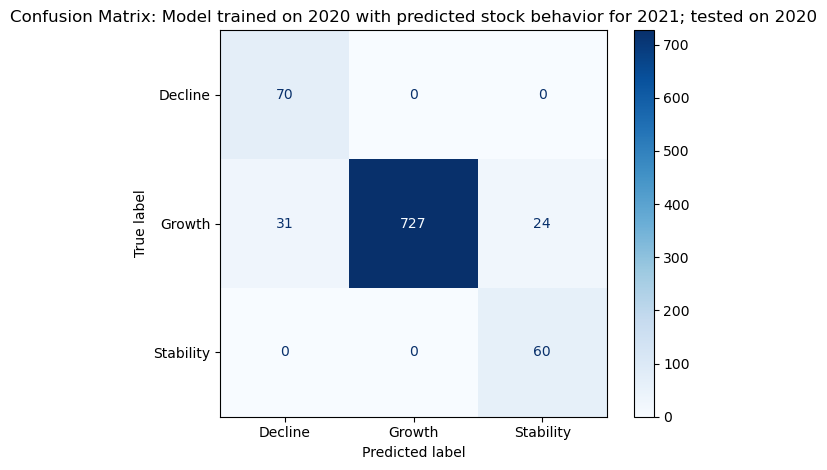


✅ Confusion Matrix (Table):
                    Pred → Decline  Pred → Growth  Pred → Stability
Actual ↓ Decline                70              0                 0
Actual ↓ Growth                 31            727                24
Actual ↓ Stability               0              0                60

✅ Classification Report:
              precision    recall  f1-score   support

     Decline       0.69      1.00      0.82        70
   Stability       1.00      0.93      0.96       782
      Growth       0.71      1.00      0.83        60

    accuracy                           0.94       912
   macro avg       0.80      0.98      0.87       912
weighted avg       0.96      0.94      0.94       912



In [556]:
import os
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# === 1. Load data ===
data_path = "../data/processed/financial_summary_2021_with_stock_behavior.csv"
df = pd.read_csv(data_path)
print(f"✅ Loaded: {df.shape[0]} rows")

# === 2. Specify features used in model training ===
features = ['Debt to Equity', 'ROE', 'ROI', 'Cash From Ops']

# === 3. Drop rows with missing values ===
df_clean = df.dropna(subset=features + ['AvgPrice_2021', 'AvgPrice_2020'])
print(f"✅ Cleaned: {df_clean.shape[0]} valid rows")

# === 4. Prepare X ===
X = df_clean[features]

# === 5. Load trained model and label encoder ===
model_path = "../model/model_xgboost_2021.pkl"
encoder_path = "../model/label_encoder_2021.pkl"

model = joblib.load(model_path)
label_encoder = joblib.load(encoder_path)

print("✅ Model and label encoder loaded.")

# === 6. Predict with model ===
y_pred = model.predict(X)

# === 7. Create target labels from price change ===
df_clean["Price Change (%)"] = (df_clean["AvgPrice_2021"] - df_clean["AvgPrice_2020"]) / df_clean["AvgPrice_2020"] * 100
df_clean["Stock Performance"] = df_clean["Price Change (%)"].apply(classify_price_change)

# === 8. Encode true labels using pre-saved encoder ===
y_real = label_encoder.transform(df_clean["Stock Performance"])

# === 9. Confusion matrix ===
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Model trained on 2020 with predicted stock behavior for 2021; tested on 2020")
plt.grid(False)
plt.tight_layout()
plt.show()

# === 10. Tabular view ===
cm_df = pd.DataFrame(
    cm,
    index=[f"Actual ↓ {label}" for label in label_encoder.classes_],
    columns=[f"Pred → {label}" for label in label_encoder.classes_]
)
print("\n✅ Confusion Matrix (Table):")
print(cm_df)

# === 11. Classification report ===
print("\n✅ Classification Report:")
print(classification_report(y_real, y_pred, target_names=["Decline", "Stability", "Growth"]))


# Let's evaluate the 2022 base model on 2021 year data

✅ Loaded: 2515 rows
✅ Cleaned: 1028 valid rows
✅ Model and label encoder loaded.


C:\Users\natal\AppData\Local\Temp\ipykernel_25088\4251870023.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Price Change (%)"] = (df_clean["AvgPrice_2022"] - df_clean["AvgPrice_2021"]) / df_clean["AvgPrice_2021"] * 100
C:\Users\natal\AppData\Local\Temp\ipykernel_25088\4251870023.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Stock Performance"] = df_clean["Price Change (%)"].apply(classify_price_change)


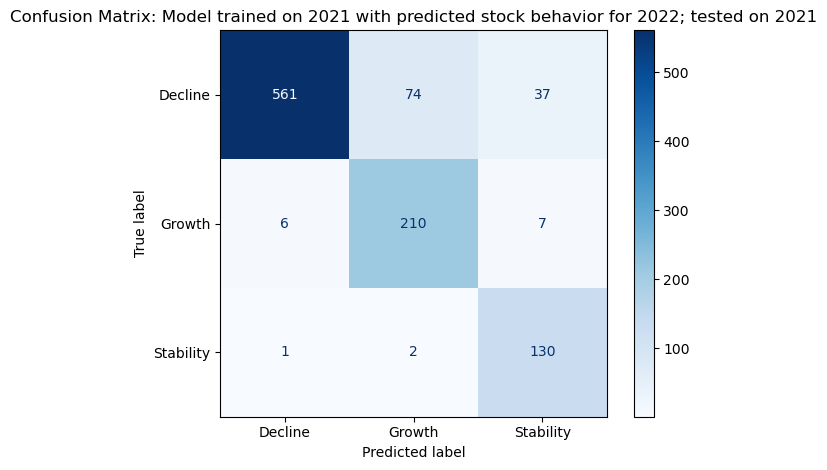


✅ Confusion Matrix (Table):
                    Pred → Decline  Pred → Growth  Pred → Stability
Actual ↓ Decline               561             74                37
Actual ↓ Growth                  6            210                 7
Actual ↓ Stability               1              2               130

✅ Classification Report:
              precision    recall  f1-score   support

     Decline       0.99      0.83      0.90       672
   Stability       0.73      0.94      0.83       223
      Growth       0.75      0.98      0.85       133

    accuracy                           0.88      1028
   macro avg       0.82      0.92      0.86      1028
weighted avg       0.90      0.88      0.88      1028



In [557]:
import os
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# === 1. Load data ===
data_path = "../data/processed/financial_summary_2022_with_stock_behavior.csv"
df = pd.read_csv(data_path)
print(f"✅ Loaded: {df.shape[0]} rows")

# === 2. Specify features used in model training ===
features = ['Debt to Equity', 'ROE', 'ROI', 'Cash From Ops']

# === 3. Drop rows with missing values ===
df_clean = df.dropna(subset=features + ['AvgPrice_2022', 'AvgPrice_2021'])
print(f"✅ Cleaned: {df_clean.shape[0]} valid rows")

# === 4. Prepare X ===
X = df_clean[features]

# === 5. Load trained model and label encoder ===
model_path = "../model/model_xgboost_2022.pkl"
encoder_path = "../model/label_encoder_2022.pkl"

model = joblib.load(model_path)
label_encoder = joblib.load(encoder_path)

print("✅ Model and label encoder loaded.")

# === 6. Predict with model ===
y_pred = model.predict(X)

# === 7. Create target labels from price change ===
df_clean["Price Change (%)"] = (df_clean["AvgPrice_2022"] - df_clean["AvgPrice_2021"]) / df_clean["AvgPrice_2021"] * 100
df_clean["Stock Performance"] = df_clean["Price Change (%)"].apply(classify_price_change)

# === 8. Encode true labels using pre-saved encoder ===
y_real = label_encoder.transform(df_clean["Stock Performance"])

# === 9. Confusion matrix ===
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Model trained on 2021 with predicted stock behavior for 2022; tested on 2021")
plt.grid(False)
plt.tight_layout()
plt.show()

# === 10. Tabular view ===
cm_df = pd.DataFrame(
    cm,
    index=[f"Actual ↓ {label}" for label in label_encoder.classes_],
    columns=[f"Pred → {label}" for label in label_encoder.classes_]
)
print("\n✅ Confusion Matrix (Table):")
print(cm_df)

# === 11. Classification report ===
print("\n✅ Classification Report:")
print(classification_report(y_real, y_pred, target_names=["Decline", "Stability", "Growth"]))


# Let's evaluate the 2024 base model on 2023 year data

✅ Loaded: 2635 rows
✅ Cleaned: 1259 valid rows
✅ Model and label encoder loaded.


C:\Users\natal\AppData\Local\Temp\ipykernel_25088\1536016987.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Price Change (%)"] = (df_clean["AvgPrice_2024"] - df_clean["AvgPrice_2023"]) / df_clean["AvgPrice_2023"] * 100
C:\Users\natal\AppData\Local\Temp\ipykernel_25088\1536016987.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Stock Performance"] = df_clean["Price Change (%)"].apply(classify_price_change)


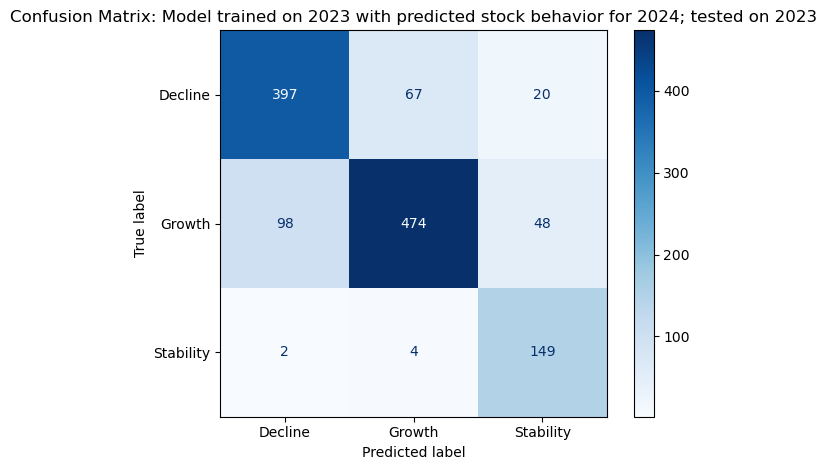


✅ Confusion Matrix (Table):
                    Pred → Decline  Pred → Growth  Pred → Stability
Actual ↓ Decline               397             67                20
Actual ↓ Growth                 98            474                48
Actual ↓ Stability               2              4               149

✅ Classification Report:
              precision    recall  f1-score   support

     Decline       0.80      0.82      0.81       484
   Stability       0.87      0.76      0.81       620
      Growth       0.69      0.96      0.80       155

    accuracy                           0.81      1259
   macro avg       0.79      0.85      0.81      1259
weighted avg       0.82      0.81      0.81      1259



In [558]:
import os
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# === 1. Load data ===
data_path = "../data/processed/financial_summary_2024_with_stock_behavior.csv"
df = pd.read_csv(data_path)
print(f"✅ Loaded: {df.shape[0]} rows")

# === 2. Specify features used in model training ===
features = ['Debt to Equity', 'ROE', 'ROI', 'Cash From Ops']

# === 3. Drop rows with missing values ===
df_clean = df.dropna(subset=features + ['AvgPrice_2024', 'AvgPrice_2023'])
print(f"✅ Cleaned: {df_clean.shape[0]} valid rows")

# === 4. Prepare X ===
X = df_clean[features]

# === 5. Load trained model and label encoder ===
model_path = "../model/model_xgboost_2024.pkl"
encoder_path = "../model/label_encoder_2024.pkl"

model = joblib.load(model_path)
label_encoder = joblib.load(encoder_path)

print("✅ Model and label encoder loaded.")

# === 6. Predict with model ===
y_pred = model.predict(X)

# === 7. Create target labels from price change ===
df_clean["Price Change (%)"] = (df_clean["AvgPrice_2024"] - df_clean["AvgPrice_2023"]) / df_clean["AvgPrice_2023"] * 100
df_clean["Stock Performance"] = df_clean["Price Change (%)"].apply(classify_price_change)

# === 8. Encode true labels using pre-saved encoder ===
y_real = label_encoder.transform(df_clean["Stock Performance"])

# === 9. Confusion matrix ===
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Model trained on 2023 with predicted stock behavior for 2024; tested on 2023")
plt.grid(False)
plt.tight_layout()
plt.show()

# === 10. Tabular view ===
cm_df = pd.DataFrame(
    cm,
    index=[f"Actual ↓ {label}" for label in label_encoder.classes_],
    columns=[f"Pred → {label}" for label in label_encoder.classes_]
)
print("\n✅ Confusion Matrix (Table):")
print(cm_df)

# === 11. Classification report ===
print("\n✅ Classification Report:")
print(classification_report(y_real, y_pred, target_names=["Decline", "Stability", "Growth"]))


# Let's evaluate the 2025 base model on 2024 year data

✅ Loaded: 2501 rows
✅ Cleaned: 1279 valid rows
✅ Model and label encoder loaded.


C:\Users\natal\AppData\Local\Temp\ipykernel_25088\2145058490.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Price Change (%)"] = (df_clean["AvgPrice_2025"] - df_clean["AvgPrice_2024"]) / df_clean["AvgPrice_2024"] * 100
C:\Users\natal\AppData\Local\Temp\ipykernel_25088\2145058490.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Stock Performance"] = df_clean["Price Change (%)"].apply(classify_price_change)


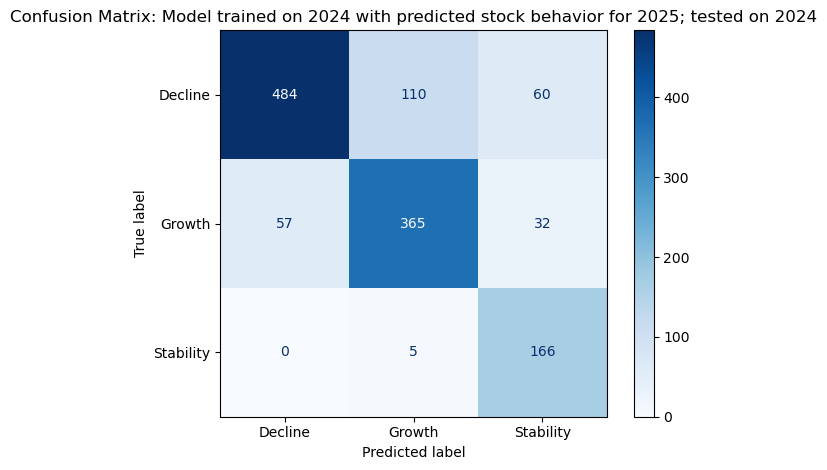


✅ Confusion Matrix (Table):
                    Pred → Decline  Pred → Growth  Pred → Stability
Actual ↓ Decline               484            110                60
Actual ↓ Growth                 57            365                32
Actual ↓ Stability               0              5               166

✅ Classification Report:
              precision    recall  f1-score   support

     Decline       0.89      0.74      0.81       654
   Stability       0.76      0.80      0.78       454
      Growth       0.64      0.97      0.77       171

    accuracy                           0.79      1279
   macro avg       0.77      0.84      0.79      1279
weighted avg       0.81      0.79      0.80      1279



In [559]:
import os
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# === 1. Load data ===
data_path = "../data/processed/financial_summary_2025_with_stock_behavior.csv"
df = pd.read_csv(data_path)
print(f"✅ Loaded: {df.shape[0]} rows")

# === 2. Specify features used in model training ===
features = ['Debt to Equity', 'ROE', 'ROI', 'Cash From Ops']

# === 3. Drop rows with missing values ===
df_clean = df.dropna(subset=features + ['AvgPrice_2025', 'AvgPrice_2024'])
print(f"✅ Cleaned: {df_clean.shape[0]} valid rows")

# === 4. Prepare X ===
X = df_clean[features]

# === 5. Load trained model and label encoder ===
model_path = "../model/model_xgboost_2025.pkl"
encoder_path = "../model/label_encoder_2025.pkl"

model = joblib.load(model_path)
label_encoder = joblib.load(encoder_path)

print("✅ Model and label encoder loaded.")

# === 6. Predict with model ===
y_pred = model.predict(X)

# === 7. Create target labels from price change ===
df_clean["Price Change (%)"] = (df_clean["AvgPrice_2025"] - df_clean["AvgPrice_2024"]) / df_clean["AvgPrice_2024"] * 100
df_clean["Stock Performance"] = df_clean["Price Change (%)"].apply(classify_price_change)

# === 8. Encode true labels using pre-saved encoder ===
y_real = label_encoder.transform(df_clean["Stock Performance"])

# === 9. Confusion matrix ===
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Model trained on 2024 with predicted stock behavior for 2025; tested on 2024")
plt.grid(False)
plt.tight_layout()
plt.show()

# === 10. Tabular view ===
cm_df = pd.DataFrame(
    cm,
    index=[f"Actual ↓ {label}" for label in label_encoder.classes_],
    columns=[f"Pred → {label}" for label in label_encoder.classes_]
)
print("\n✅ Confusion Matrix (Table):")
print(cm_df)

# === 11. Classification report ===
print("\n✅ Classification Report:")
print(classification_report(y_real, y_pred, target_names=["Decline", "Stability", "Growth"]))


# Let's test model_xgboost.pkl trained on combined dataset (2021, 2022, 2024)

In [ ]:
import os
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# === 1. Load data ===
data_path = "../data/processed/financial_summary_2025_with_stock_behavior.csv"
df = pd.read_csv(data_path)
print(f"✅ Loaded: {df.shape[0]} rows")

# === 2. Specify features used in model training ===
features = ['Debt to Equity', 'ROE', 'ROI', 'Cash From Ops']

# === 3. Drop rows with missing values ===
df_clean = df.dropna(subset=features + ['AvgPrice_2025', 'AvgPrice_2024'])
print(f"✅ Cleaned: {df_clean.shape[0]} valid rows")

# === 4. Prepare X ===
X = df_clean[features]

# === 5. Load trained model and label encoder ===
model_path = "../model/model_xgboost.pkl"
encoder_path = "../model/label_encoder.pkl"

model = joblib.load(model_path)
label_encoder = joblib.load(encoder_path)

print("✅ Model and label encoder loaded.")

# === 6. Predict with model ===
y_pred = model.predict(X)

# === 7. Create target labels from price change ===
df_clean["Price Change (%)"] = (df_clean["AvgPrice_2025"] - df_clean["AvgPrice_2024"]) / df_clean["AvgPrice_2024"] * 100
df_clean["Stock Performance"] = df_clean["Price Change (%)"].apply(classify_price_change)

# === 8. Encode true labels using pre-saved encoder ===
y_real = label_encoder.transform(df_clean["Stock Performance"])

# === 9. Confusion matrix ===
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Model trained on 2024 with predicted stock behavior for 2025; tested on 2024")
plt.grid(False)
plt.tight_layout()
plt.show()

# === 10. Tabular view ===
cm_df = pd.DataFrame(
    cm,
    index=[f"Actual ↓ {label}" for label in label_encoder.classes_],
    columns=[f"Pred → {label}" for label in label_encoder.classes_]
)
print("\n✅ Confusion Matrix (Table):")
print(cm_df)

# === 11. Classification report ===
print("\n✅ Classification Report:")
print(classification_report(y_real, y_pred, target_names=["Decline", "Stability", "Growth"]))

# Ensemblled model (Combine predictions using majority vote provided by each model 2021, 2022, 2024, 2025)

In [ ]:
import os
import pandas as pd
import joblib
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from scipy.stats import mode

# === 1. Load data ===
data_path = "../data/processed/financial_summary_2025_with_stock_behavior.csv"
df = pd.read_csv(data_path)
print(f"✅ Loaded: {df.shape[0]} rows")

# === 2. Specify features used in model training ===
features = ['Debt to Equity', 'ROE', 'ROI', 'Cash From Ops']

# === 3. Drop rows with missing values ===
df_clean = df.dropna(subset=features + ['AvgPrice_2025', 'AvgPrice_2024']).copy()
print(f"✅ Cleaned: {df_clean.shape[0]} valid rows")

# === 4. Prepare X ===
X = df_clean[features]

# === 5. Load all trained models and the final label encoder ===
models = {}
for year in [2021, 2022, 2024, 2025]:
    models[year] = {
        "model": joblib.load(f"../model/model_xgboost_{year}.pkl"),
        "encoder": joblib.load(f"../model/label_encoder_{year}.pkl")
    }

# Use the most recent encoder for decoding real labels
label_encoder = models[2025]["encoder"]
print("✅ All models and encoders loaded.")

# === 6. Get predictions from each model ===
predictions = []
for year, obj in models.items():
    preds = obj["model"].predict(X)
    predictions.append(preds)

# === 7. Combine predictions using majority vote ===
y_pred_ensemble, _ = mode(predictions, axis=0)
y_pred_ensemble = y_pred_ensemble.flatten()

# === 8. Define target labels ===
def classify_price_change(pct_change):
    if pd.isna(pct_change):
        return None
    if pct_change <= -5:
        return "Decline"
    elif -5 < pct_change < 5:
        return "Stability"
    else:
        return "Growth"

df_clean["Price Change (%)"] = (df_clean["AvgPrice_2025"] - df_clean["AvgPrice_2024"]) / df_clean["AvgPrice_2024"] * 100
df_clean["Stock Performance"] = df_clean["Price Change (%)"].apply(classify_price_change)

# === 9. Encode true labels using latest encoder ===
y_real = label_encoder.transform(df_clean["Stock Performance"])

# === 10. Confusion matrix ===
cm = confusion_matrix(y_real, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Ensemble (2021–2025) voting")
plt.grid(False)
plt.tight_layout()
plt.show()

# === 11. Tabular view ===
cm_df = pd.DataFrame(
    cm,
    index=[f"Actual ↓ {label}" for label in label_encoder.classes_],
    columns=[f"Pred → {label}" for label in label_encoder.classes_]
)
print("\n✅ Confusion Matrix (Table):")
print(cm_df)

# === 12. Classification report ===
print("\n✅ Classification Report:")
print(classification_report(y_real, y_pred_ensemble, target_names=label_encoder.classes_))


# Soft-Voting Ensemble Using predict_proba()

In [ ]:
import os
import pandas as pd
import joblib
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# === 1. Load data ===
data_path = "../data/processed/financial_summary_2025_with_stock_behavior.csv"
df = pd.read_csv(data_path)
print(f"✅ Loaded: {df.shape[0]} rows")

# === 2. Specify features used in model training ===
features = ['Debt to Equity', 'ROE', 'ROI', 'Cash From Ops']

# === 3. Drop rows with missing values ===
df_clean = df.dropna(subset=features + ['AvgPrice_2025', 'AvgPrice_2024']).copy()
print(f"✅ Cleaned: {df_clean.shape[0]} valid rows")

# === 4. Prepare input features (X) ===
X = df_clean[features]

# === 5. Load models and encoders ===
models = {}
for year in [2021, 2022, 2024, 2025]:
    models[year] = {
        "model": joblib.load(f"../model/model_xgboost_{year}.pkl"),
        "encoder": joblib.load(f"../model/label_encoder_{year}.pkl")
    }
print("✅ Models and encoders loaded.")

# === 6. Predict probabilities from each model ===
probs_list = []
for year, obj in models.items():
    probs = obj["model"].predict_proba(X)  # shape: (n_samples, 3)
    probs_list.append(probs)

# === 7. Average class probabilities (Soft Voting) ===
avg_probs = np.mean(probs_list, axis=0)  # shape: (n_samples, 3)
y_pred_ensemble = np.argmax(avg_probs, axis=1)  # final prediction by highest confidence

# === 8. Define classification logic ===
def classify_price_change(pct_change):
    if pd.isna(pct_change):
        return None
    if pct_change <= -5:
        return "Decline"
    elif -5 < pct_change < 5:
        return "Stability"
    else:
        return "Growth"

# === 9. Calculate true class labels ===
df_clean["Price Change (%)"] = (df_clean["AvgPrice_2025"] - df_clean["AvgPrice_2024"]) / df_clean["AvgPrice_2024"] * 100
df_clean["Stock Performance"] = df_clean["Price Change (%)"].apply(classify_price_change)

# Use the encoder from the latest model for consistency
label_encoder = models[2025]["encoder"]
y_real = label_encoder.transform(df_clean["Stock Performance"])

# === 10. Confusion Matrix ===
cm = confusion_matrix(y_real, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Ensemble Soft Voting (2021–2025)")
plt.grid(False)
plt.tight_layout()
plt.show()

# === 11. Tabular Confusion Matrix ===
cm_df = pd.DataFrame(
    cm,
    index=[f"Actual ↓ {label}" for label in label_encoder.classes_],
    columns=[f"Pred → {label}" for label in label_encoder.classes_]
)
print("\n✅ Confusion Matrix (Table):")
print(cm_df)

# === 12. Classification Report ===
print("\n✅ Classification Report:")
print(classification_report(y_real, y_pred_ensemble, target_names=label_encoder.classes_))


# Full Stacking Ensemble Implementation

✅ Loaded: 2501 rows
✅ Cleaned: 1279 valid rows
✅ Meta-feature matrix shape: (1279, 12)


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:57:57] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Meta-model trained.


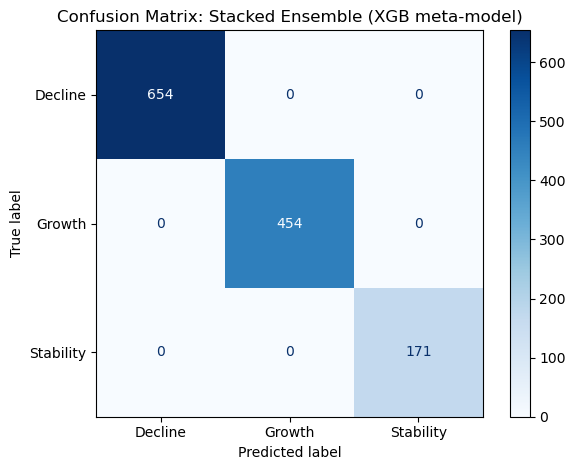


✅ Confusion Matrix (Table):
                    Pred → Decline  Pred → Growth  Pred → Stability
Actual ↓ Decline               654              0                 0
Actual ↓ Growth                  0            454                 0
Actual ↓ Stability               0              0               171

✅ Classification Report:
              precision    recall  f1-score   support

     Decline       1.00      1.00      1.00       654
      Growth       1.00      1.00      1.00       454
   Stability       1.00      1.00      1.00       171

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



In [560]:
import os
import pandas as pd
import joblib
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# === 1. Load data ===
data_path = "../data/processed/financial_summary_2025_with_stock_behavior.csv"
df = pd.read_csv(data_path)
print(f"✅ Loaded: {df.shape[0]} rows")

# === 2. Define training features and target computation ===
features = ['Debt to Equity', 'ROE', 'ROI', 'Cash From Ops']

# === 3. Clean missing values ===
df_clean = df.dropna(subset=features + ['AvgPrice_2025', 'AvgPrice_2024']).copy()
print(f"✅ Cleaned: {df_clean.shape[0]} valid rows")

X_base = df_clean[features].copy()

# === 4. Define classification rule (same as training) ===
def classify_price_change(pct_change):
    if pd.isna(pct_change):
        return None
    if pct_change <= -5:
        return "Decline"
    elif -5 < pct_change < 5:
        return "Stability"
    else:
        return "Growth"

df_clean["Price Change (%)"] = (df_clean["AvgPrice_2025"] - df_clean["AvgPrice_2024"]) / df_clean["AvgPrice_2024"] * 100
df_clean["Stock Performance"] = df_clean["Price Change (%)"].apply(classify_price_change)

# === 5. Load all base models and encoders ===
models = {}
for year in [2021, 2022, 2024, 2025]:
    models[year] = {
        "model": joblib.load(f"../model/model_xgboost_{year}.pkl"),
        "encoder": joblib.load(f"../model/label_encoder_{year}.pkl")
    }

# Use 2025 encoder to encode true labels
label_encoder = models[2025]["encoder"]
y_real = label_encoder.transform(df_clean["Stock Performance"])

# === 6. Build meta-feature matrix from base model probabilities ===
meta_features = []

for year in [2021, 2022, 2024, 2025]:
    proba = models[year]["model"].predict_proba(X_base)  # shape: (n_samples, 3)
    meta_features.append(proba)

# Concatenate horizontally: (n_samples, 12)
X_meta = np.hstack(meta_features)
print(f"✅ Meta-feature matrix shape: {X_meta.shape}")

# === 7. Train meta-model on meta-features ===
meta_model = XGBClassifier(use_label_encoder=True, eval_metric='mlogloss', random_state=42)
meta_model.fit(X_meta, y_real)
print("✅ Meta-model trained.")

# === 8. Predict using the stacked model ===
y_pred_stacked = meta_model.predict(X_meta)

# === 9. Evaluate performance ===
cm = confusion_matrix(y_real, y_pred_stacked)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Stacked Ensemble (XGB meta-model)")
plt.grid(False)
plt.tight_layout()
plt.show()

# === 10. Tabular view of confusion matrix ===
cm_df = pd.DataFrame(
    cm,
    index=[f"Actual ↓ {label}" for label in label_encoder.classes_],
    columns=[f"Pred → {label}" for label in label_encoder.classes_]
)
print("\n✅ Confusion Matrix (Table):")
print(cm_df)

# === 11. Classification report ===
print("\n✅ Classification Report:")
print(classification_report(y_real, y_pred_stacked, target_names=label_encoder.classes_))


In [ ]:
joblib.dump(meta_model, "../model/meta_model_stacked_2025.pkl")

# 5-Fold Out-of-Fold Stacking

✅ Loaded: 2501 rows

🔁 Fold 1/5
  ▶ Training base model: 2021
  ▶ Training base model: 2022


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:19] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:19] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  ▶ Training base model: 2024
  ▶ Training base model: 2025


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:19] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔁 Fold 2/5
  ▶ Training base model: 2021


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  ▶ Training base model: 2022
  ▶ Training base model: 2024


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  ▶ Training base model: 2025

🔁 Fold 3/5
  ▶ Training base model: 2021


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:21] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  ▶ Training base model: 2022
  ▶ Training base model: 2024


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:21] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:21] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  ▶ Training base model: 2025

🔁 Fold 4/5
  ▶ Training base model: 2021


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:21] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:21] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  ▶ Training base model: 2022
  ▶ Training base model: 2024


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:22] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:22] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  ▶ Training base model: 2025


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:22] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:22] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔁 Fold 5/5
  ▶ Training base model: 2021
  ▶ Training base model: 2022
  ▶ Training base model: 2024


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:22] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:23] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  ▶ Training base model: 2025

✅ Out-of-fold meta-features generated.
Meta-feature shape: (1279, 12)


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:23] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:58:23] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Meta-model trained.


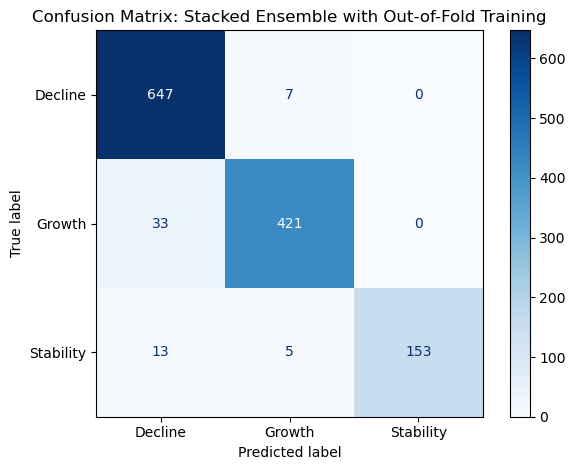


✅ Confusion Matrix (Table):
                    Pred → Decline  Pred → Growth  Pred → Stability
Actual ↓ Decline               647              7                 0
Actual ↓ Growth                 33            421                 0
Actual ↓ Stability              13              5               153

✅ Classification Report:
              precision    recall  f1-score   support

     Decline       0.93      0.99      0.96       654
      Growth       0.97      0.93      0.95       454
   Stability       1.00      0.89      0.94       171

    accuracy                           0.95      1279
   macro avg       0.97      0.94      0.95      1279
weighted avg       0.96      0.95      0.95      1279



In [561]:
import os
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# === 1. Load data ===
data_path = "../data/processed/financial_summary_2025_with_stock_behavior.csv"
df = pd.read_csv(data_path)
print(f"✅ Loaded: {df.shape[0]} rows")

# === 2. Specify features ===
features = ['Debt to Equity', 'ROE', 'ROI', 'Cash From Ops']
df_clean = df.dropna(subset=features + ['AvgPrice_2025', 'AvgPrice_2024']).copy()

# === 3. Compute target labels ===
def classify_price_change(pct_change):
    if pd.isna(pct_change):
        return None
    if pct_change <= -5:
        return "Decline"
    elif -5 < pct_change < 5:
        return "Stability"
    else:
        return "Growth"

df_clean["Price Change (%)"] = (df_clean["AvgPrice_2025"] - df_clean["AvgPrice_2024"]) / df_clean["AvgPrice_2024"] * 100
df_clean["Stock Performance"] = df_clean["Price Change (%)"].apply(classify_price_change)

X = df_clean[features].copy()
label_encoder = joblib.load("../model/label_encoder_2025.pkl")
y = label_encoder.transform(df_clean["Stock Performance"])

# === 4. Prepare out-of-fold setup ===
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# === 5. Base models to train per fold ===
base_years = [2021, 2022, 2024, 2025]
n_classes = len(label_encoder.classes_)

# Initialize meta-feature matrix
meta_features = np.zeros((X.shape[0], len(base_years) * n_classes))

# === 6. Out-of-Fold training and prediction ===
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n🔁 Fold {fold + 1}/{n_folds}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    col = 0  # start column for meta-features in current fold

    for year in base_years:
        print(f"  ▶ Training base model: {year}")
        model = joblib.load(f"../model/model_xgboost_{year}.pkl")

        # Train on train set, predict on val set
        model.fit(X_train, y_train)  # retrain on fold (optional: re-use model if robust)
        probs = model.predict_proba(X_val)

        # Fill in meta-feature matrix
        meta_features[val_idx, col:col + n_classes] = probs
        col += n_classes

print("\n✅ Out-of-fold meta-features generated.")
print(f"Meta-feature shape: {meta_features.shape}")

# === 7. Train meta-model ===
meta_model = XGBClassifier(use_label_encoder=True, eval_metric='mlogloss', random_state=42)
meta_model.fit(meta_features, y)
print("✅ Meta-model trained.")

# === 8. Final prediction ===
y_pred = meta_model.predict(meta_features)

# === 9. Evaluation ===
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Stacked Ensemble with Out-of-Fold Training")
plt.grid(False)
plt.tight_layout()
plt.show()

# === 10. Tabular Confusion Matrix ===
cm_df = pd.DataFrame(
    cm,
    index=[f"Actual ↓ {label}" for label in label_encoder.classes_],
    columns=[f"Pred → {label}" for label in label_encoder.classes_]
)
print("\n✅ Confusion Matrix (Table):")
print(cm_df)

# === 11. Classification Report ===
print("\n✅ Classification Report:")
print(classification_report(y, y_pred, target_names=label_encoder.classes_))

In [ ]:
# === 12. Save Meta-Model ===
joblib.dump(meta_model, "../model/meta_model_stacked_oof_2025.pkl")
print("\n💾 Meta-model saved.")